# 4_2-model-3-cnn-datagen-.ipynb






**Input** images in .png from data directory

**Output** multiclass model

**Source(s)** course tutorial

---

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Hard Codes

In [0]:
dir_path = '/content/drive/My Drive/CAPSTONE/img_data'

# Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

datagen = ImageDataGenerator(
          rescale=1./255,
)

In [0]:
X = datagen.flow_from_directory(dir_path,
                                target_size=(512,256),
                                color_mode='rgb',
                                class_mode='categorical',
                                batch_size=32,
                                shuffle=True,
                                seed=42,
                                save_to_dir=None,
                                save_prefix='',
                                save_format='png',
                                follow_links=False,
                                subset=None,
                                interpolation='nearest',
                                )

Found 425 images belonging to 5 classes.


# Generate and Split Data




In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

In [0]:
train_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size = (512, 256),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [0]:
validation_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size = (512, 256),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 85 images belonging to 5 classes.


# Compile Model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(512, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Run Model

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = 10
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2/2 [==============================] - 13s 6s/step - loss: 4.0608 - accuracy: 0.2453 - val_loss: 17.1523 - val_accuracy: 0.4375
Epoch 2/10
2/2 [==============================] - 19s 9s/step - loss: 12.8222 - accuracy: 0.3594 - val_loss: 0.8862 - val_accuracy: 0.5938
Epoch 3/10
2/2 [==============================] - 16s 8s/step - loss: 0.7559 - accuracy: 0.6415 - val_loss: 1.1438 - val_accuracy: 0.5938
Epoch 4/10
2/2 [==============================] - 13s 6s/step - loss: 1.0605 - accuracy: 0.6415 - val_loss: 1.4472 - val_accuracy: 0.5469
Epoch 5/10
2/2 [==============================] - 16s 8s/step - loss: 0.8456 - accuracy: 0.6604 - val_loss: 0.6952 - val_accuracy: 0.8125
Epoch 6/10
2/2 [==============================] - 16s 8s/step - loss: 0.6998 - accuracy: 0.7969 - val_loss: 0.4236 - val_accuracy: 0.9531
Epoch 7/10
2/2 [==============================] - 16s 8s/step - loss: 0.4574 - accuracy: 0.796

# Plot Model Performance

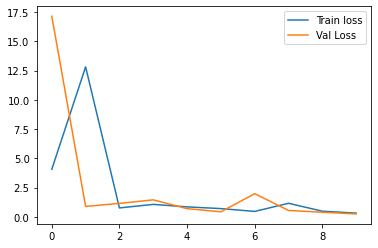

In [0]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();